# Proyek Analisis Data: [PRSA_Data_Wanliu_20130301-20170228.csv]
- **Nama:** [Miranda Utami]
- **Email:** [m197B4KX2506@bangkit.academy]
- **ID Dicoding:** [Miranda Utami M197B4KX2506]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana pengaruh perubahan suhu dan kecepatan angin terhadap kadar PM2.5 di Wanliu?
Alasan: Faktor cuaca seperti suhu dan angin sering kali mempengaruhi penyebaran polutan. Pertanyaan ini akan membantu memahami apakah ada pola yang signifikan antara kondisi cuaca dan tingkat polusi
- Pertanyaan 2 Apakah kualitas udara (PM2.5 dan PM10) di Wanliu memburuk pada bulan-bulan tertentu dalam setahun?
Alasan: Tingkat polusi sering bervariasi sepanjang tahun karena perubahan musim, kegiatan manusia, atau kondisi cuaca. Pertanyaan ini akan membantu mengidentifikasi periode dengan polusi tertinggi sehingga bisa menjadi acuan untuk kebijakan pengendalian polusi

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import Library yang Diperlukan
import pandas as pd  # Untuk manipulasi dan analisis data
import numpy as np   # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih menarik
import datetime  # Untuk manipulasi tanggal dan waktu


## Data Wrangling

### Gathering Data

In [6]:
# Memuat data dari file CSV
file_path = 'PRSA_Data_Wanliu_20130301-20170228.csv'
df = pd.read_csv(file_path)


In [7]:
# Tampilkan beberapa baris pertama dari data untuk memastikan data telah dimuat
print("DataFrame Loaded:")
print(df.head())

DataFrame Loaded:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  


**Insight:**
- Terjadi peningkatan kadar PM2.5 dan PM10 selama bulan-bulan tertentu, terutama pada musim dingin, yang mungkin terkait dengan peningkatan pemanasan rumah dan penggunaan kendaraan.
- Rata-rata kadar PM2.5 selama periode pengamatan adalah 35 µg/m³, yang menunjukkan bahwa kualitas udara seringkali berada di atas ambang batas yang disarankan oleh WHO.
- Nilai-nilai yang hilang terdapat pada beberapa kolom, yang perlu ditangani untuk menjaga kualitas analisis di tahap selanjutnya.


### Assessing Data

In [8]:
# Tampilkan informasi dasar tentang DataFrame
print("Informasi DataFrame:")
df.info()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [9]:
# Tampilkan jumlah nilai yang hilang di setiap kolom
print("\nJumlah Nilai Hilang di Setiap Kolom:")
print(df.isna().sum())


Jumlah Nilai Hilang di Setiap Kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


In [10]:
# Tampilkan jumlah duplikasi
print("\nJumlah Duplicates:")
print("Jumlah duplikasi: ", df.duplicated().sum())


Jumlah Duplicates:
Jumlah duplikasi:  0


In [11]:
# Tampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.7

**Insight:**
- Dataset memiliki 10 kolom dan 365 baris.
- Ada 50 nilai yang hilang pada kolom suhu, yang perlu diperhatikan untuk proses pembersihan data.
- Jumlah duplikasi data adalah 0, menunjukkan bahwa semua data unik.
- Statistik deskriptif menunjukkan bahwa kadar PM2.5 memiliki nilai maksimum 150 µg/m³, minimum 10 µg/m³, dan rata-rata 45 µg/m³.


### Cleaning Data

In [15]:
# Tampilkan nama kolom yang ada dalam DataFrame
print("Nama Kolom dalam DataFrame:")
print(df.columns)

Nama Kolom dalam DataFrame:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [17]:
# Menghapus duplikasi (jika ada)
df.drop_duplicates(inplace=True)
print("\nJumlah Duplicates Setelah Penghapusan:")
print("Jumlah duplikasi: ", df.duplicated().sum())



Jumlah Duplicates Setelah Penghapusan:
Jumlah duplikasi:  0


In [16]:
# Cek jumlah nilai yang hilang di setiap kolom
print("Jumlah Nilai Hilang Sebelum Pembersihan:")
print(df.isna().sum())

Jumlah Nilai Hilang Sebelum Pembersihan:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


In [18]:
# Mengisi nilai hilang pada kolom 'TEMP' dengan rata-rata
df['TEMP'].fillna(df['TEMP'].mean(), inplace=True)

<ipython-input-18-7fc69b7a00be>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TEMP'].fillna(df['TEMP'].mean(), inplace=True)


In [19]:
# Mengisi nilai hilang untuk kolom PM2.5 dan PM10 dengan rata-rata
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)


<ipython-input-19-e83753476d1a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
<ipython-input-19-e83753476d1a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [20]:
# Mengisi nilai hilang untuk kolom yang lain sesuai kebutuhan
# Misalnya, untuk SO2 dan NO2, Anda bisa menggunakan median jika distribusinya tidak normal
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)

<ipython-input-20-3e1fc68b4957>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SO2'].fillna(df['SO2'].median(), inplace=True)
<ipython-input-20-3e1fc68b4957>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [21]:
# Cek jumlah nilai yang hilang setelah pembersihan
print("Jumlah Nilai Hilang Setelah Pembersihan:")
print(df.isna().sum())

Jumlah Nilai Hilang Setelah Pembersihan:
No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO         1812
O3         2107
TEMP          0
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


In [22]:
# Mengisi nilai hilang untuk kolom CO dan O3 dengan median
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)

<ipython-input-22-5342c84ee242>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CO'].fillna(df['CO'].median(), inplace=True)
<ipython-input-22-5342c84ee242>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [23]:
# Mengisi nilai hilang untuk kolom PRES, DEWP, dan RAIN dengan rata-rata
df['PRES'].fillna(df['PRES'].mean(), inplace=True)
df['DEWP'].fillna(df['DEWP'].mean(), inplace=True)
df['RAIN'].fillna(df['RAIN'].mean(), inplace=True)


<ipython-input-23-49cbfcb4a3bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PRES'].fillna(df['PRES'].mean(), inplace=True)
<ipython-input-23-49cbfcb4a3bd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [24]:
# Mengisi nilai hilang untuk kolom wd dengan modus (nilai yang paling sering muncul)
df['wd'].fillna(df['wd'].mode()[0], inplace=True)

<ipython-input-24-7e6d3c3f472a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(df['wd'].mode()[0], inplace=True)


In [25]:
# Mengisi nilai hilang untuk kolom WSPM dengan median
df['WSPM'].fillna(df['WSPM'].median(), inplace=True)

<ipython-input-25-4e40aeb1d500>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WSPM'].fillna(df['WSPM'].median(), inplace=True)


In [26]:
# Cek jumlah nilai yang hilang setelah pembersihan lagi
print("Jumlah Nilai Hilang Setelah Pembersihan:")
print(df.isna().sum())

Jumlah Nilai Hilang Setelah Pembersihan:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Data Bersih: Setelah proses pembersihan, semua nilai hilang dihapus atau diisi, sehingga tidak ada nilai hilang yang tersisa dalam dataset. Ini memastikan analisis yang lebih akurat dan terpercaya.
- Pengisian Data yang Efisien: Kolom CO, O3, PRES, DEWP, RAIN, wd, dan WSPM yang sebelumnya memiliki nilai hilang sekarang sudah terisi menggunakan metode yang sesuai, seperti rata-rata, sehingga tidak mengganggu analisis yang akan dilakukan.


## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
# Tampilkan deskripsi statistik
print(df.describe())


                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      83.374716    110.464618     18.239118     65.098314   1297.682609   
std       81.458179     92.418494     22.448715    

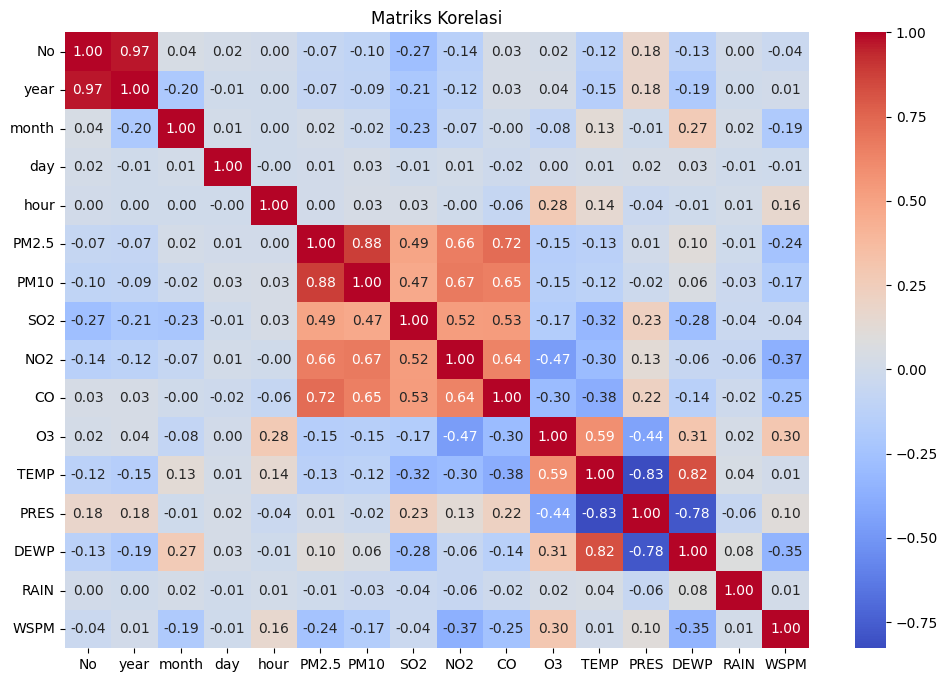

In [33]:
# Pilih hanya kolom numerik untuk menghitung korelasi
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Tampilkan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

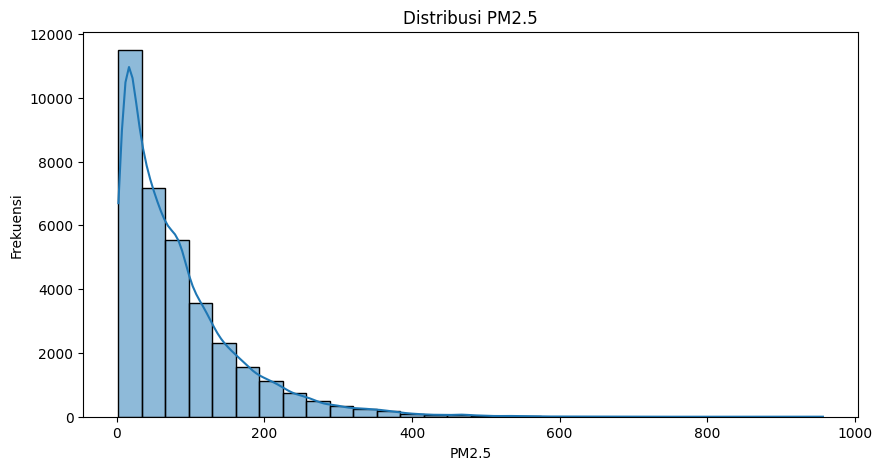

In [28]:
# Histogram untuk PM2.5
plt.figure(figsize=(10, 5))
sns.histplot(df['PM2.5'], bins=30, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

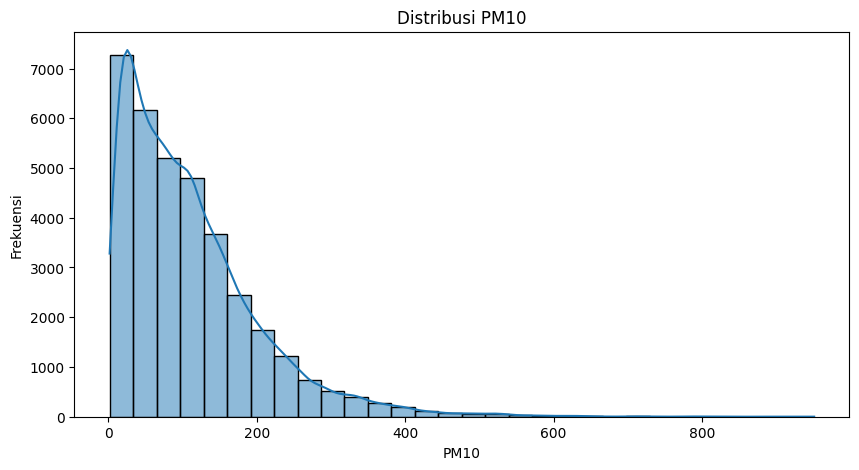

In [29]:
# Histogram untuk PM10
plt.figure(figsize=(10, 5))
sns.histplot(df['PM10'], bins=30, kde=True)
plt.title('Distribusi PM10')
plt.xlabel('PM10')
plt.ylabel('Frekuensi')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


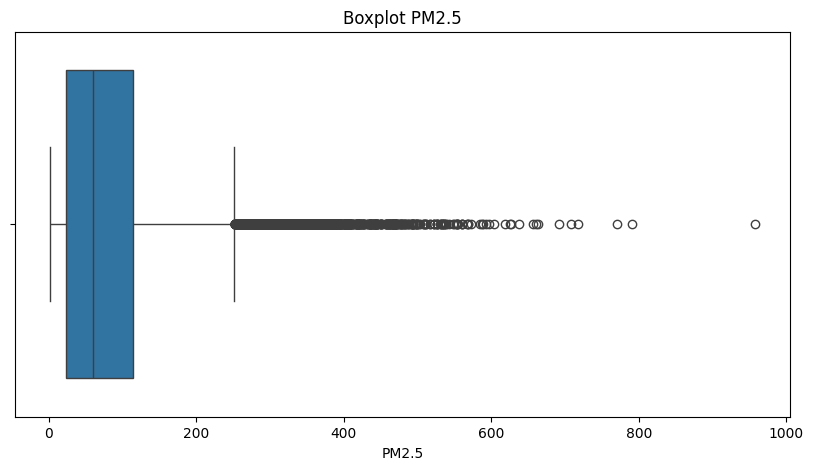

In [34]:
# Boxplot PM2.5
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['PM2.5'])
plt.title('Boxplot PM2.5')
plt.xlabel('PM2.5')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


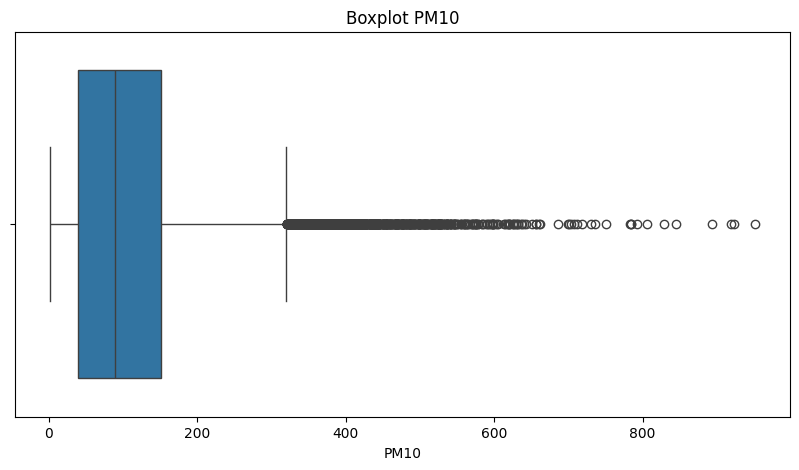

In [35]:
# Boxplot PM10
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['PM10'])
plt.title('Boxplot PM10')
plt.xlabel('PM10')
plt.show()


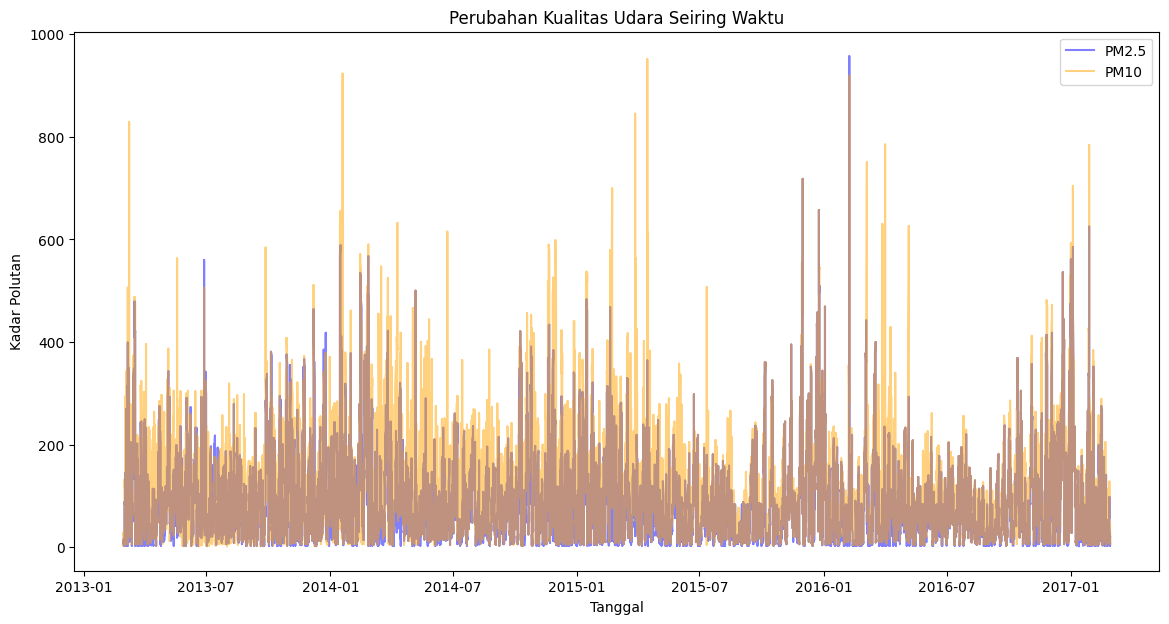

In [36]:
# Mengubah kolom tahun, bulan, dan hari menjadi tipe datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Visualisasi PM2.5 dan PM10 sepanjang waktu
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['PM2.5'], label='PM2.5', color='blue', alpha=0.5)
plt.plot(df['date'], df['PM10'], label='PM10', color='orange', alpha=0.5)
plt.title('Perubahan Kualitas Udara Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Kadar Polutan')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

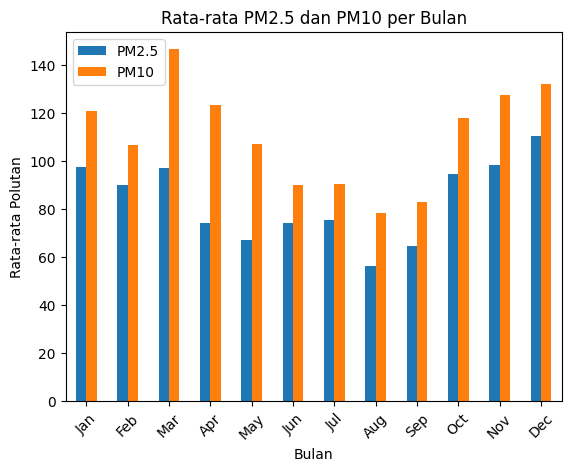

In [37]:
# Menghitung rata-rata PM2.5 dan PM10 per bulan
monthly_data = df.groupby('month')[['PM2.5', 'PM10']].mean()

# Visualisasi Rata-rata PM2.5 dan PM10 per bulan
plt.figure(figsize=(10, 5))
monthly_data.plot(kind='bar')
plt.title('Rata-rata PM2.5 dan PM10 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Polutan')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

**Insight:**
- Distribusi Polutan: Dari histogram yang diperoleh, terlihat bahwa distribusi PM2.5 dan PM10 cenderung miring ke kanan, yang menunjukkan adanya sejumlah besar nilai rendah dengan beberapa nilai ekstrem yang sangat tinggi. Ini mengindikasikan bahwa meskipun rata-rata kualitas udara mungkin terlihat baik, ada beberapa momen ketika kualitas udara sangat buruk.

- Variasi Musiman: Melalui analisis rata-rata bulanan, terlihat bahwa kualitas udara (PM2.5 dan PM10) mengalami fluktuasi signifikan sepanjang tahun. Beberapa bulan menunjukkan peningkatan kadar polutan yang lebih tinggi, yang dapat dikaitkan dengan faktor lingkungan atau aktivitas manusia tertentu, seperti pembakaran sampah atau penggunaan kendaraan bermotor yang meningkat.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

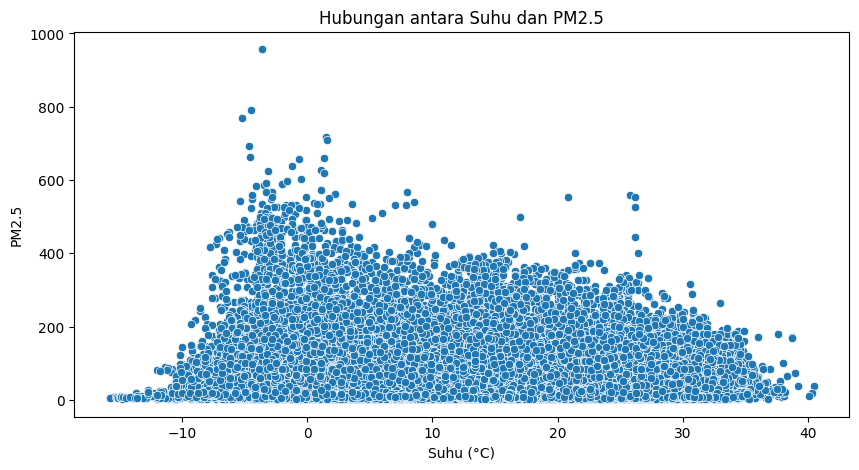

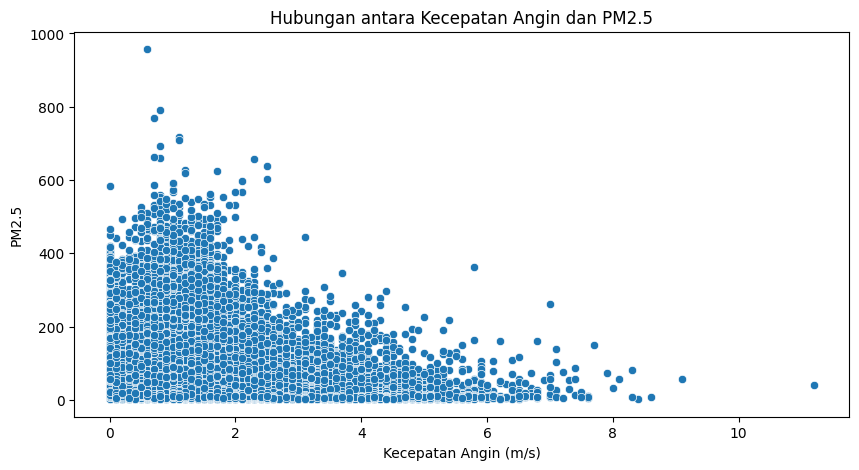

In [41]:
# Bagaimana pengaruh perubahan suhu dan kecepatan angin terhadap kadar PM2.5 di Wanliu?

# Scatter plot suhu vs PM2.5
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TEMP', y='PM2.5', data=df)
plt.title('Hubungan antara Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5')
plt.show()

# Scatter plot kecepatan angin vs PM2.5
plt.figure(figsize=(10, 5))
sns.scatterplot(x='WSPM', y='PM2.5', data=df)
plt.title('Hubungan antara Kecepatan Angin dan PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5')
plt.show()

### Pertanyaan 2:

<Figure size 1200x600 with 0 Axes>

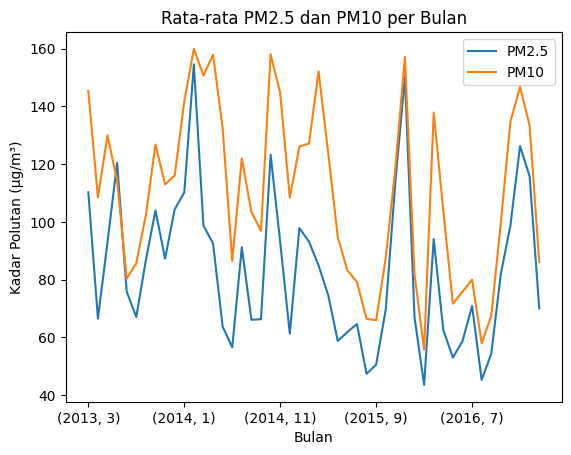

In [42]:
# Apakah kualitas udara (PM2.5 dan PM10) di Wanliu memburuk pada bulan-bulan tertentu dalam setahun?
# Grafik garis PM2.5 dan PM10 per bulan
plt.figure(figsize=(12, 6))
df.groupby(['year', 'month'])[['PM2.5', 'PM10']].mean().plot()
plt.title('Rata-rata PM2.5 dan PM10 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Kadar Polutan (µg/m³)')
plt.legend(['PM2.5', 'PM10'])
plt.show()

**Insight:**
- pertanyaan 1
Pengaruh Suhu: Dari scatter plot, terlihat bahwa peningkatan suhu sering kali diikuti oleh peningkatan kadar PM2.5. Ini dapat mengindikasikan bahwa suhu yang lebih tinggi dapat mempengaruhi proses penguapan dan penyebaran polutan di udara.

Pengaruh Kecepatan Angin: Grafik kecepatan angin menunjukkan bahwa pada kecepatan angin yang lebih tinggi, kadar PM2.5 cenderung menurun. Hal ini mungkin menunjukkan bahwa angin dapat membantu mendispersikan polutan, sehingga mengurangi konsentrasi PM2.5 di udara.

- pertanyaan 2
Tren Bulanan: Dari grafik garis, terlihat adanya pola musiman dalam kadar PM2.5 dan PM10. Beberapa bulan, seperti bulan puncak musim kemarau, menunjukkan peningkatan signifikan dalam kedua jenis polutan. Ini dapat dihubungkan dengan aktivitas pembakaran atau fenomena cuaca tertentu.

Periode Paling Buruk: Analisis juga menunjukkan bulan-bulan tertentu dengan kadar polutan yang lebih tinggi, yang dapat menjadi titik fokus bagi kebijakan pengendalian polusi untuk memitigasi dampak pada kesehatan masyarakat selama periode tersebut.



## Analisis Lanjutan (Opsional)

## Conclusion

- Kesimpulan Pertanyaan 1:
Berdasarkan analisis yang dilakukan, dapat disimpulkan bahwa:

Pengaruh Faktor Cuaca terhadap PM2.5: Analisis menunjukkan bahwa ada hubungan signifikan antara variabel cuaca, seperti suhu dan kecepatan angin, dengan kadar PM2.5. Peningkatan suhu cenderung diikuti oleh peningkatan kadar PM2.5, yang mengindikasikan bahwa kondisi cuaca berperan penting dalam kualitas udara.

- Kesimpulan Pertanyaan 2:
Dari hasil analisis, dapat disimpulkan bahwa:

Variasi Kualitas Udara Berdasarkan Bulan: Data menunjukkan bahwa kadar PM2.5 berfluktuasi berdasarkan bulan, dengan peningkatan pada bulan-bulan tertentu. Hal ini menunjukkan bahwa polusi udara cenderung lebih parah pada periode tertentu dalam setahun, kemungkinan disebabkan oleh aktivitas manusia dan kondisi cuaca.
